Dataset shape: (800, 12)
   #                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0  1              Bulbasaur  Grass  Poison  45      49       49       65   
1  2                Ivysaur  Grass  Poison  60      62       63       80   
2  3               Venusaur  Grass  Poison  80      82       83      100   
3  3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4  4             Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False  

Model Accuracy: 0.956

Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       150
        True       0.71      0.50      0.59        10

    accuracy                           0.96      

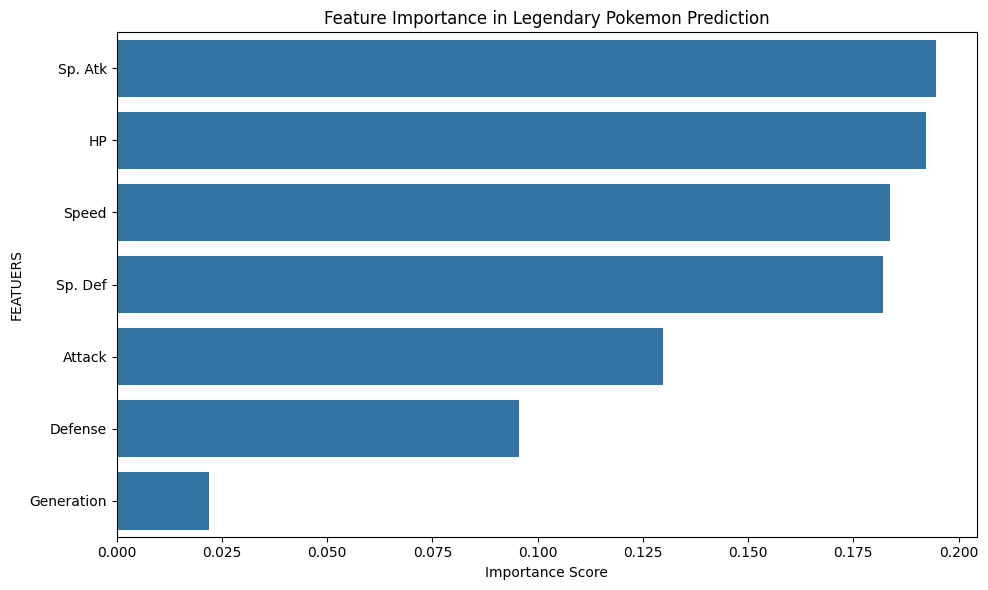


Example Prediction:
Legendary: No
Probability: 0.046


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Legendary Pokemon Prediction using Random Forest
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Pokemon Data.csv')
print("Dataset shape:", data.shape)
print(data.head())

# Prepare features and target
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
X = data[features]
y = data['Legendary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,#number of decision tree=100, better performance, slower
    max_depth=10,#depth of single tree will be 10 (max), prevents overfitting
    random_state=42,
    class_weight='balanced'#handles imbalance data
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({#we are making another table
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Legendary Pokemon Prediction')
plt.xlabel('Importance Score')
plt.ylabel('FEATUERS')
plt.tight_layout()
plt.show()

# Example prediction for new Pokemon
new_pokemon = np.array([[100, 134, 110, 95, 100, 61, 1]])  # Example stats
prediction = rf_model.predict(new_pokemon)
probability = rf_model.predict_proba(new_pokemon)

print(f"\nExample Prediction:")
print(f"Legendary: {'Yes' if prediction[0] else 'No'}")
print(f"Probability: {probability[0][1]:.3f}")